 # Trantando dados string para ML

    Usaremos duas tecnicas para isso

- dummys
- one hot encoding
        

In [ ]:
! pip install pandas -q

# para leitura de arquivos xlsx

! pip install openpyxl -q
! pip install sklearn -q

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Caso nao esteja utilizando o vs code, para aparecer a barra horizontal
pd.set_option('display.max_rows', None) # Caso nao esteja utilizando o vs code, para aparecer a barra Vertical

df = pd.read_excel('./dados.xlsx')


In [4]:
df.shape

(986, 7)

In [3]:
df.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,LABORGUINI,3.0,12,1200,700,AUTOMATICO,BRASIL
1,LABORGUINI,3.0,12,1200,700,AUTOMATICO,EUA
2,LABORGUINI,3.0,12,1200,700,AUTOMATICO,ESPANHA
3,FERRARI,3.0,12,1400,640,AUTOMATICO,CANADA
4,ASTON MARTIN,3.5,10,1600,620,AUTOMATICO,INGLATERRA


In [26]:
df['PAIS'].value_counts()

PAIS
3    99
6    99
5    99
4    99
8    99
0    99
1    98
9    98
2    98
7    98
Name: count, dtype: int64

In [5]:
df.groupby('TRANSMISSAO').size()

TRANSMISSAO
AUTOMATICO    536
MANUAL        450
dtype: int64

In [6]:
df.groupby('MODELO').size()

MODELO
ASTON MARTIN     66
BMW X1           30
BMW X5           36
COROLLA          36
CORSA            42
CRETA            36
FERRARI          54
GOL              24
HB20             30
HONDA FIT        66
JEEP COMPASS     36
JEEP RENEGADE    24
LABORGUINI       50
MERCEDES SL80    66
MOBI             66
PAJERO           36
PALIO            66
PARATI           24
PASSAT           66
SAVEIRO          42
UNO              66
VECTRA           24
dtype: int64

# Metodo One Hot Encoding

    Usaremos o scikit-learn para esta tecinca

    ! pip install scikit-learn


In [7]:
df = pd.read_excel('./dados.xlsx')

df.shape

(986, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MODELO       986 non-null    object 
 1   KM-LITRO     984 non-null    float64
 2   CILINDROS    986 non-null    int64  
 3   PESO(KG)     986 non-null    int64  
 4   CAVALOS      986 non-null    int64  
 5   TRANSMISSAO  986 non-null    object 
 6   PAIS         986 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.0+ KB


In [9]:
df.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,LABORGUINI,3.0,12,1200,700,AUTOMATICO,BRASIL
1,LABORGUINI,3.0,12,1200,700,AUTOMATICO,EUA
2,LABORGUINI,3.0,12,1200,700,AUTOMATICO,ESPANHA
3,FERRARI,3.0,12,1400,640,AUTOMATICO,CANADA
4,ASTON MARTIN,3.5,10,1600,620,AUTOMATICO,INGLATERRA


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
enconder = LabelEncoder()

for serie in ['PAIS','TRANSMISSAO','MODELO']:
    df[serie] = enconder.fit_transform(df[serie])

In [12]:
df.shape

(986, 7)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MODELO       986 non-null    int64  
 1   KM-LITRO     984 non-null    float64
 2   CILINDROS    986 non-null    int64  
 3   PESO(KG)     986 non-null    int64  
 4   CAVALOS      986 non-null    int64  
 5   TRANSMISSAO  986 non-null    int64  
 6   PAIS         986 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 54.0 KB


In [13]:
df_dados = pd.read_excel('./dados.xlsx')

legendas = {}

for var in ['PAIS','TRANSMISSAO','MODELO']:
    enconder = LabelEncoder()
    
    dados_originais = df_dados[var].copy()
    
    df_dados[var] = enconder.fit_transform(dados_originais)
    
    legendas_var = dict(zip(enconder.classes_, enconder.transform(enconder.classes_)))
    legendas[var] = legendas_var

for var, mapa in legendas.items():
    print(f"\nLegenda para {var}:")
    for k, v in mapa.items():
        print(f"{k} ; {v}")


Legenda para PAIS:
ALEMANHA ; 0
AUSTRALIA ; 1
BELGICA ; 2
BRASIL ; 3
CANADA ; 4
ESPANHA ; 5
EUA ; 6
HOLANDA ; 7
INGLATERRA ; 8
NORUEGA ; 9

Legenda para TRANSMISSAO:
AUTOMATICO ; 0
MANUAL ; 1

Legenda para MODELO:
ASTON MARTIN ; 0
BMW X1 ; 1
BMW X5 ; 2
COROLLA ; 3
CORSA ; 4
CRETA ; 5
FERRARI ; 6
GOL ; 7
HB20 ; 8
HONDA FIT ; 9
JEEP COMPASS ; 10
JEEP RENEGADE ; 11
LABORGUINI ; 12
MERCEDES SL80 ; 13
MOBI ; 14
PAJERO ; 15
PALIO ; 16
PARATI ; 17
PASSAT ; 18
SAVEIRO ; 19
UNO ; 20
VECTRA ; 21


# Legenda para PAIS:

ALEMANHA ; 0
AUSTRALIA ; 1
BELGICA ; 2
BRASIL ; 3
CANADA ; 4
ESPANHA ; 5
EUA ; 6
HOLANDA ; 7
INGLATERRA ; 8
NORUEGA ; 9

# Legenda para TRANSMISSAO:

AUTOMATICO ; 0
MANUAL ; 1

# Legenda para MODELO:

ASTON MARTIN ; 0
BMW X1 ; 1
BMW X5 ; 2
COROLLA ; 3
CORSA ; 4
CRETA ; 5
FERRARI ; 6
GOL ; 7
HB20 ; 8
HONDA FIT ; 9
JEEP COMPASS ; 10
JEEP RENEGADE ; 11
LABORGUINI ; 12
MERCEDES SL80 ; 13
MOBI ; 14
PAJERO ; 15
PALIO ; 16
PARATI ; 17
PASSAT ; 18
SAVEIRO ; 19
UNO ; 20
VECTRA ; 21

In [ ]:
# Explicando o dicionario
# dicionario = {chave: valor}

pessoas = {
    'luciano':{'idade':31, 'altura': 1.75},
    'fernada':{'idade':18, 'altura': 1.62},
}

for nome, segundo_dic in pessoas.items():
    print(f"\nNome: {nome}")
    for chave, valor in segundo_dic.items():
        print(f"{chave}: {valor}")


Nome: luciano
idade: 31
altura: 1.75

Nome: fernada
idade: 18
altura: 1.62


In [14]:
df.shape

(986, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MODELO       986 non-null    int64  
 1   KM-LITRO     984 non-null    float64
 2   CILINDROS    986 non-null    int64  
 3   PESO(KG)     986 non-null    int64  
 4   CAVALOS      986 non-null    int64  
 5   TRANSMISSAO  986 non-null    int64  
 6   PAIS         986 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 54.0 KB


In [16]:
df.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,12,3.0,12,1200,700,0,3
1,12,3.0,12,1200,700,0,6
2,12,3.0,12,1200,700,0,5
3,6,3.0,12,1400,640,0,4
4,0,3.5,10,1600,620,0,8


In [17]:
df_dados.describe()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
count,986.000000,984.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,10.855984,8.209553,6.115619,1959.432049,262.622718,0.456389,4.498986
std,6.333342,3.718411,2.764683,459.769620,209.544669,0.498347,2.871618
min,0.000000,3.000000,3.000000,1200.000000,116.000000,0.000000,0.000000
25%,6.000000,4.500000,4.000000,1700.000000,118.000000,0.000000,2.000000
50%,12.000000,8.000000,4.000000,1700.000000,118.000000,0.000000,4.500000
75%,16.000000,11.000000,8.000000,2300.000000,340.000000,1.000000,7.000000
max,21.000000,14.000000,12.000000,3000.000000,1800.000000,1.000000,9.000000


In [18]:
df['PAIS'].value_counts()

PAIS
3    99
6    99
5    99
4    99
8    99
0    99
1    98
9    98
2    98
7    98
Name: count, dtype: int64

In [19]:
df.groupby('PAIS').size()

PAIS
0    99
1    98
2    98
3    99
4    99
5    99
6    99
7    98
8    99
9    98
dtype: int64

In [ ]:
# O que é o MinMaxScaler e o StandardScaler?
# O MinMaxScaler é uma técnica de normalização que transforma os dados para que fiquem entre 0 e 1.
# O StandardScaler é uma técnica de padronização que transforma os dados para que tenham média 0 e desvio padrão 1.

from sklearn.preprocessing import MinMaxScaler, StandardScaler # mimmaxscaler faz a normalização dos dados e o Standard faz a padronização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

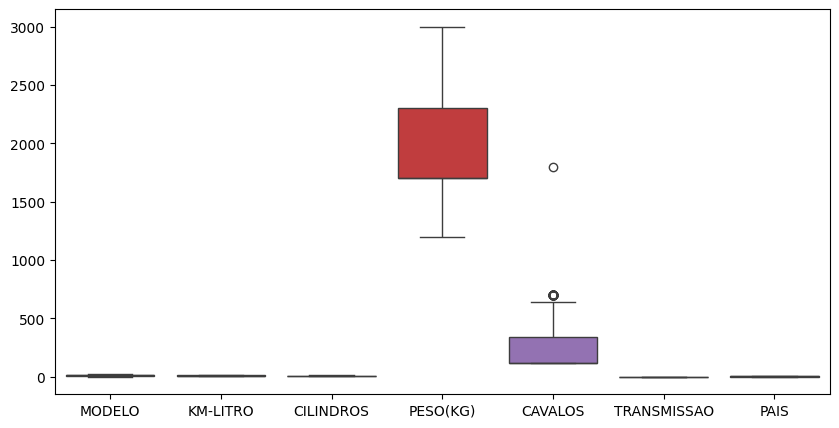

In [32]:
# Antes da Padronização

plt.figure(figsize=(10,5))
ax = sns.boxplot(data=df_dados)
plt.show()

In [ ]:
# Padronizando os dados

padronizar = StandardScaler().fit(df_dados)

df_padronizado = padronizar.transform(df_dados)
df_padronizado

array([[ 0.18072557, -1.40172823,  2.12949108, ...,  2.08833394,
        -0.91627083, -0.52226527],
       [ 0.18072557, -1.40172823,  2.12949108, ...,  2.08833394,
        -0.91627083,  0.52297199],
       [ 0.18072557, -1.40172823,  2.12949108, ...,  2.08833394,
        -0.91627083,  0.17455957],
       ...,
       [ 1.44452282,  1.42349437, -0.76561848, ..., -0.69052633,
         1.09138037, -0.17385285],
       [ 0.49667488,  1.55802878, -0.76561848, ..., -0.69052633,
         1.09138037,  1.21979682],
       [ 1.1285735 , -0.05638414, -0.04184109, ..., -0.69052633,
         1.09138037, -1.56750252]])

In [ ]:
# Transformando o array em um DataFrame
df_padronizado = pd.DataFrame(df_padronizado, columns=df_dados.columns)

df_padronizado.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,0.180726,-1.401728,2.129491,-1.652605,2.088334,-0.916271,-0.522265
1,0.180726,-1.401728,2.129491,-1.652605,2.088334,-0.916271,0.522972
2,0.180726,-1.401728,2.129491,-1.652605,2.088334,-0.916271,0.174560
3,-0.767122,-1.401728,2.129491,-1.217384,1.801854,-0.916271,-0.173853
4,-1.714970,-1.267194,1.405714,-0.782162,1.706360,-0.916271,1.219797


In [24]:
df_padronizado.describe()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
count,9.860000e+02,9.840000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02
mean,1.171026e-17,-3.402879e-16,-1.981737e-17,2.071816e-17,9.908684e-17,-6.305526e-17,-1.076443e-16
std,1.000507e+00,1.000509e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00
min,-1.714970e+00,-1.401728e+00,-1.127507e+00,-1.652605e+00,-7.000757e-01,-9.162708e-01,-1.567503e+00
25%,-7.671224e-01,-9.981250e-01,-7.656185e-01,-5.645517e-01,-6.905263e-01,-9.162708e-01,-8.706777e-01
50%,1.807256e-01,-5.638414e-02,-7.656185e-01,-5.645517e-01,-6.905263e-01,-9.162708e-01,3.533594e-04
75%,8.126242e-01,7.508223e-01,6.819363e-01,7.411120e-01,3.694513e-01,1.091380e+00,8.713844e-01
max,1.602497e+00,1.558029e+00,2.129491e+00,2.264386e+00,7.340475e+00,1.091380e+00,1.568209e+00


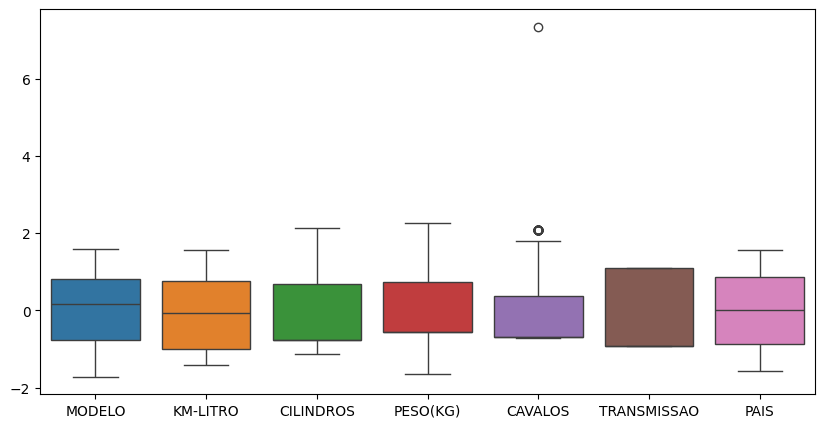

In [31]:
# Depois da Padronização

plt.figure(figsize=(10,5))
ax = sns.boxplot(data=df_padronizado)
plt.show()